In [52]:
import sys
sys.path.append('..')
from custom_lib import lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, Image
import graphviz
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
%matplotlib inline 
sns.set(style="ticks")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29864\1794867714.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, Image


In [53]:
data = pd.read_csv("drugs_class.csv", sep=',')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [54]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [56]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [57]:
for feature in ["Sex", "BP", "Cholesterol", "Drug"]:
    print(feature, ": ", data[feature].unique())

Sex :  ['F' 'M']
BP :  ['HIGH' 'LOW' 'NORMAL']
Cholesterol :  ['HIGH' 'NORMAL']
Drug :  ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [58]:
data_enc = data.copy()

In [59]:
le = LabelEncoder()

le.fit(data["Drug"])
data_enc["Drug"] = le.transform(data["Drug"])

le.fit(data["Sex"])
data_enc["Sex"] = le.transform(data["Sex"])

le.fit(data["BP"])
data_enc["BP"] = le.transform(data["BP"])

le.fit(data["Cholesterol"])
data_enc["Cholesterol"] = le.transform(data["Cholesterol"])

data_enc.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [60]:
for feature in ["Sex", "BP", "Cholesterol", "Drug"]:
    print(feature, ": ", data_enc[feature].unique())

Sex :  [0 1]
BP :  [0 1 2]
Cholesterol :  [0 1]
Drug :  [0 3 4 1 2]


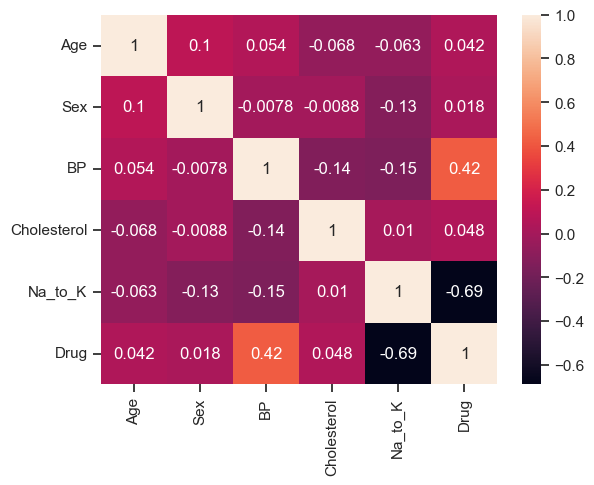

In [61]:
corr = data_enc.corr()
heatmap = sns.heatmap(corr, annot=True)

In [62]:
data_X = data_enc.drop("Drug", axis=1)
data_y = data_enc["Drug"]

In [63]:
lib.print_class_proportions(data_y)

Метка 	 Количество 	 Процент встречаемости
0 	 91 	 	 45.5%
1 	 23 	 	 11.5%
2 	 16 	 	 8.0%
3 	 16 	 	 8.0%
4 	 54 	 	 27.0%


In [64]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=1, stratify=data_y)

### 1. Бэггинг

In [65]:
bc1 = BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)
bc1.fit(X_train, y_train)

c:\Users\Lenovo\Desktop\BMSTU\SEM_6\TMO\labs-proj\.venv\lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\Lenovo\Desktop\BMSTU\SEM_6\TMO\labs-proj\.venv\lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)

In [66]:
# Какие объекты были использованы в обучающей выборке каждого дерева
bc1.estimators_samples_

[array([137, 103, 142, 138,  26, 152, 138,  50, 126,  67,  34,  24,  43,
        149,  58, 112, 118, 104,  46, 104,  27,  74, 147,  37,  45, 132,
         44, 142,  69, 156,  74,  23, 108,  64,   0,  50, 150,  78,  42,
        112,  77, 156,  50,   4, 114,  14,  56, 105,  43,  39,  43, 139,
         80, 127, 159, 116,  56,  54, 110, 138, 136,   4,  79,  62,  44,
         60, 111,  74, 153, 114, 125, 137, 102, 153,  88,  14, 130, 107,
        110, 118,  41, 151,  62,  66,  37,  14,  52, 120, 117,  68,  73,
         39, 104,  92, 150,  44, 139,  22,  66, 107,  27, 153,  85,  54,
         40, 146,  95,  38,  92,  97,  61, 116,  73, 116,  68,  48,  20,
        124,  82,  37,  58, 101,   7, 123, 141, 146,  38, 116, 105,  91,
          7,   0, 131,   3,  22,  59, 133,  20, 106, 123,  11, 121,  66,
         18,  46,  52, 147,  62,  89,  86,  37, 115, 132,  38,  90,  84,
         86,  25,  48,  77]),
 array([ 95,  46,  93, 129,  44, 136,  87, 149,  61,  68,  87, 102,  31,
         34,  17,  58

In [67]:
# Сконвертируем эти данные в двоичную матрицу, 
# 1 соответствует элементам, попавшим в обучающую выборку
bin_array = np.zeros((5, X_train.shape[0]))
for i in range(5):
    for j in bc1.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,

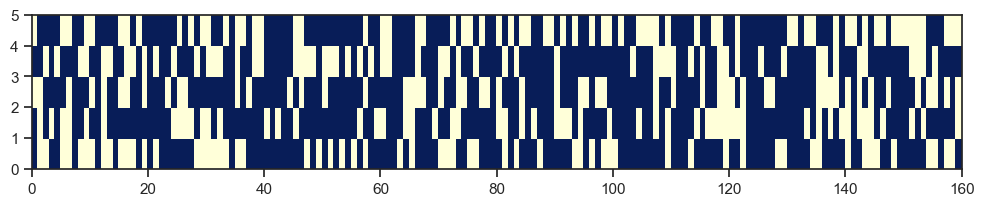

In [68]:
# И визуализируем (синим цветом показаны данные, которые попали в обучающую выборку)
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

In [69]:
# Оценим Out-of-bag error, теоретическое значение 37%
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 38.12%
Для модели № 2 размер OOB составляет 35.0%
Для модели № 3 размер OOB составляет 34.38%
Для модели № 4 размер OOB составляет 36.88%
Для модели № 5 размер OOB составляет 42.5%


In [70]:
# Out-of-bag error, возвращаемый классификатором
# Для классификации используется метрика accuracy
bc1.oob_score_, 1-bc1.oob_score_

(0.925, 0.07499999999999996)

In [71]:
# Параметр oob_decision_function_ возвращает вероятности 
# принадлежности объекта к классам на основе oob
# значения nan могут возвращаться в случае маленькой выборки
bc1.oob_decision_function_[55:70]

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [nan, nan, nan, nan, nan],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [nan, nan, nan, nan, nan],
       [ 0.,  1.,  0.,  0.,  0.]])

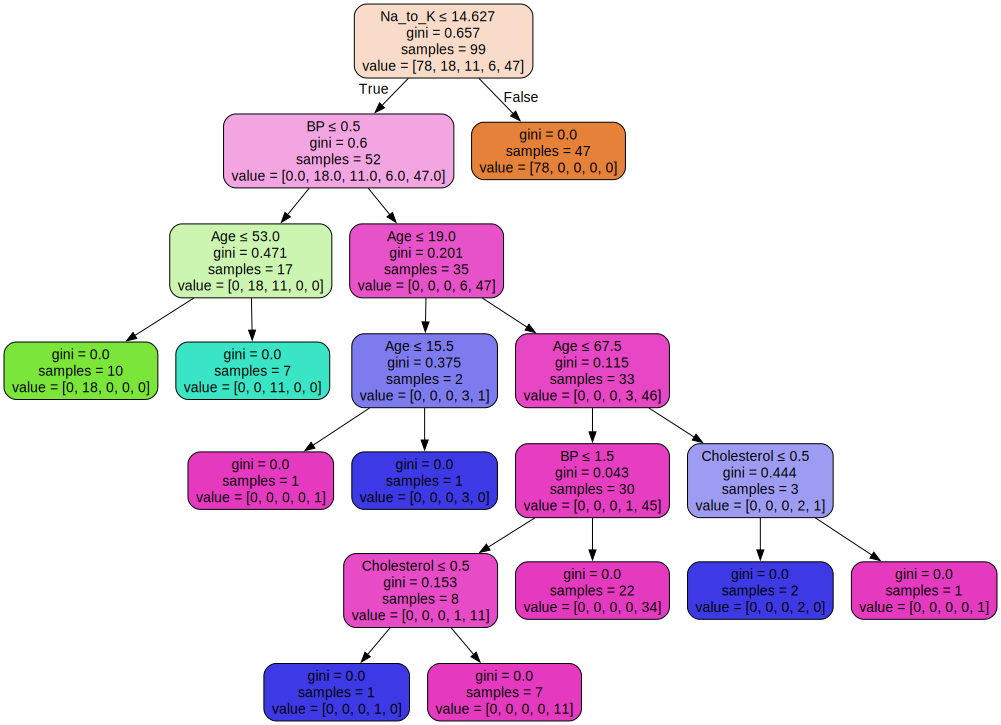

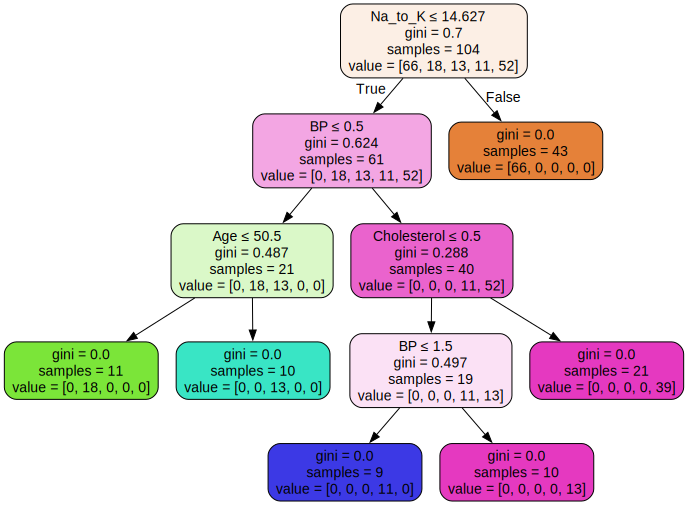

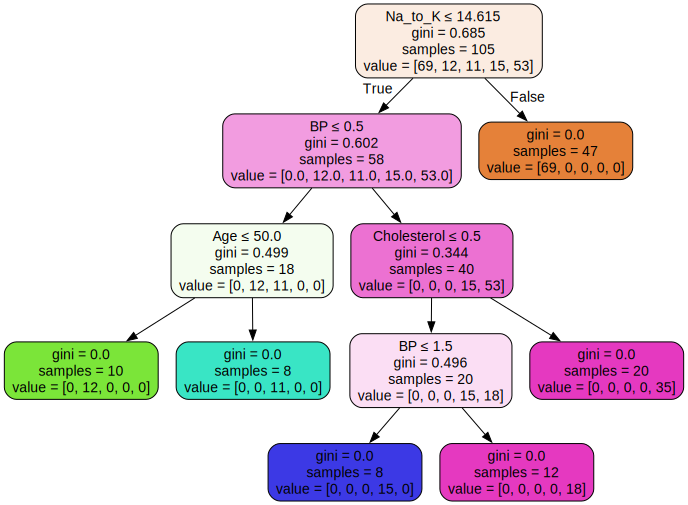

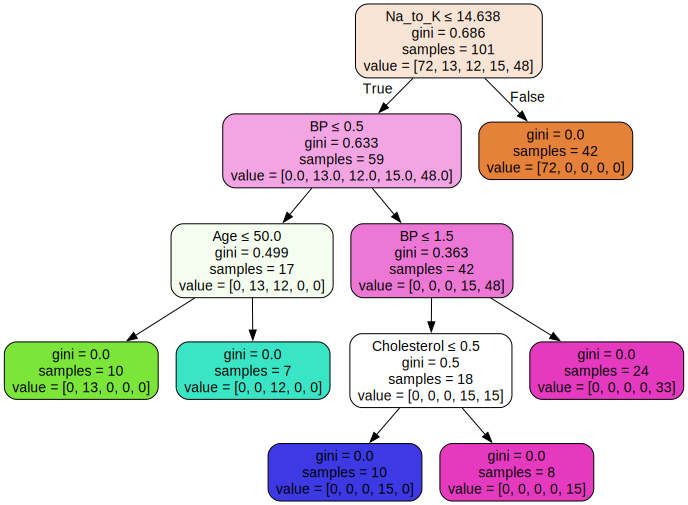

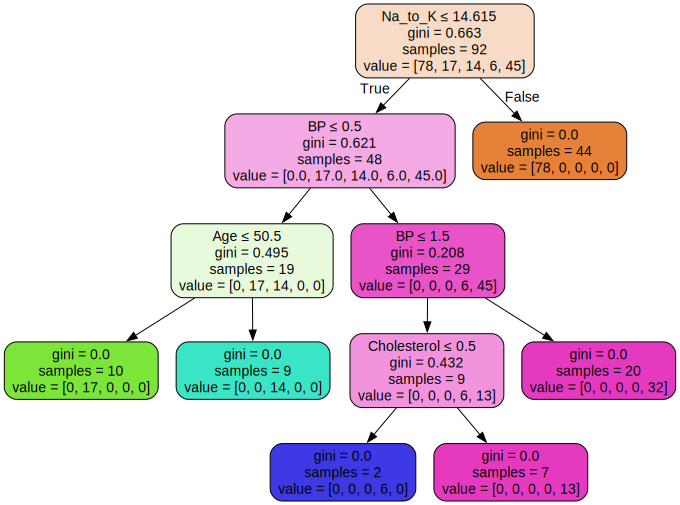

In [72]:
for i in range(5):
    dot_data = export_graphviz(bc1.estimators_[i], out_file=None, 
                            feature_names=list(X_train.columns),
                            filled=True, rounded=True, special_characters=True)  
    graph = graphviz.Source(dot_data)
    display(graph)

In [73]:
bc1.score(X_test, y_test)

0.975

In [74]:
bc1_predictions = bc1.predict(X_test)
cm = confusion_matrix(y_test, bc1_predictions)
cm

array([[18,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 1,  0,  0,  0, 10]], dtype=int64)

In [75]:
lib.print_accuracy_score_for_classes(y_test, bc1_predictions)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0
3 	 1.0
4 	 0.9090909090909091


### 2. Случаный лес

In [76]:
# Обучим классификатор на 5 деревьях
tree1 = RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)
tree1.fit(X_train, y_train)

c:\Users\Lenovo\Desktop\BMSTU\SEM_6\TMO\labs-proj\.venv\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)

In [77]:
# Out-of-bag error, возвращаемый классификатором
tree1.oob_score_, 1-tree1.oob_score_

(0.8375, 0.16249999999999998)

In [78]:
tree1.oob_decision_function_[55:70]

array([[0.        , 0.        , 1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.66666667, 0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.

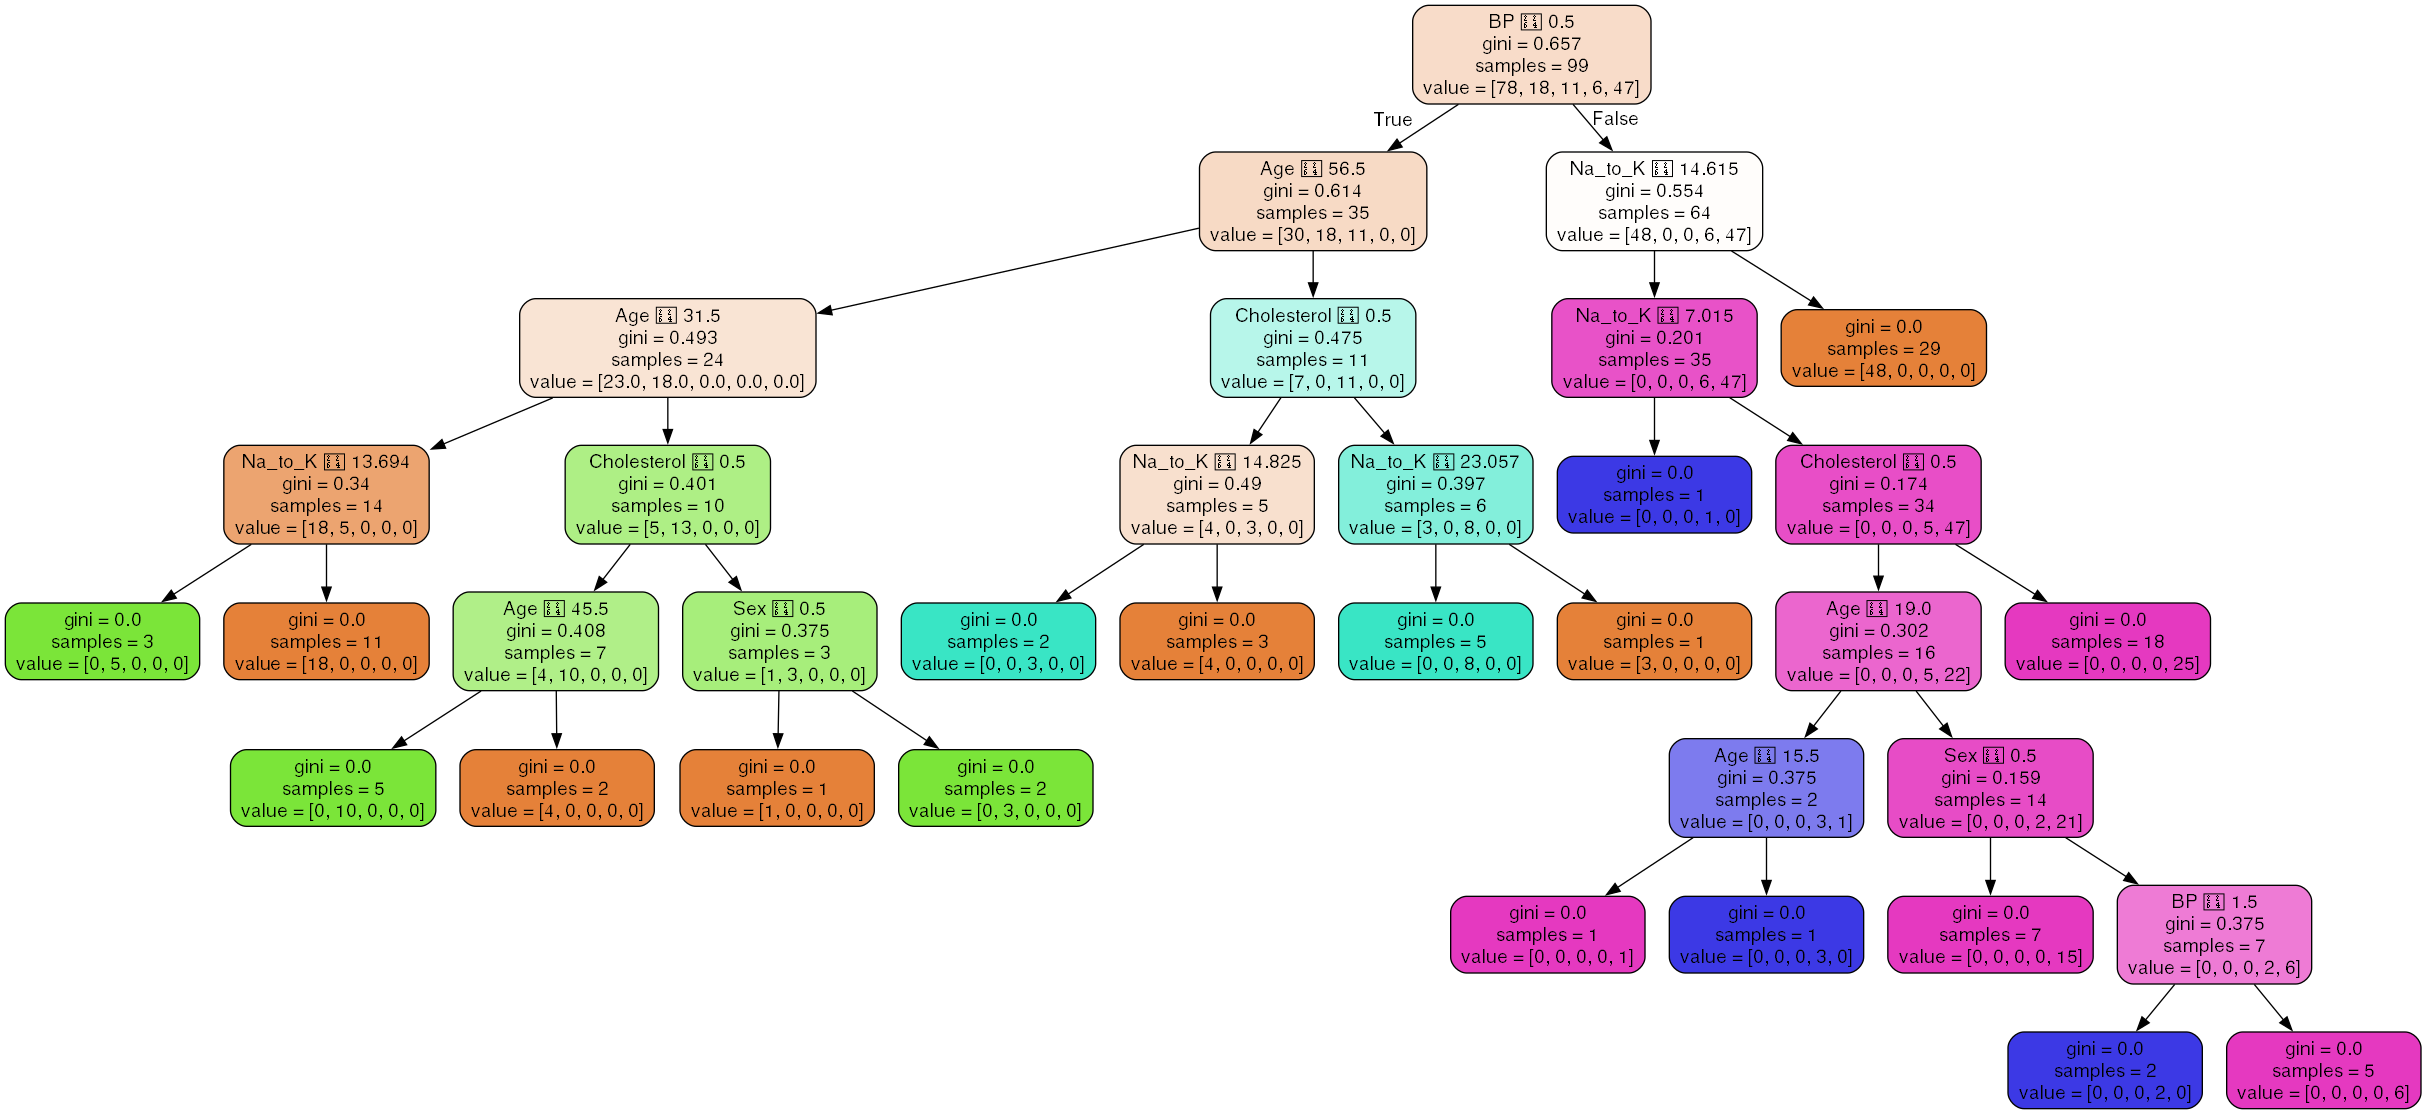

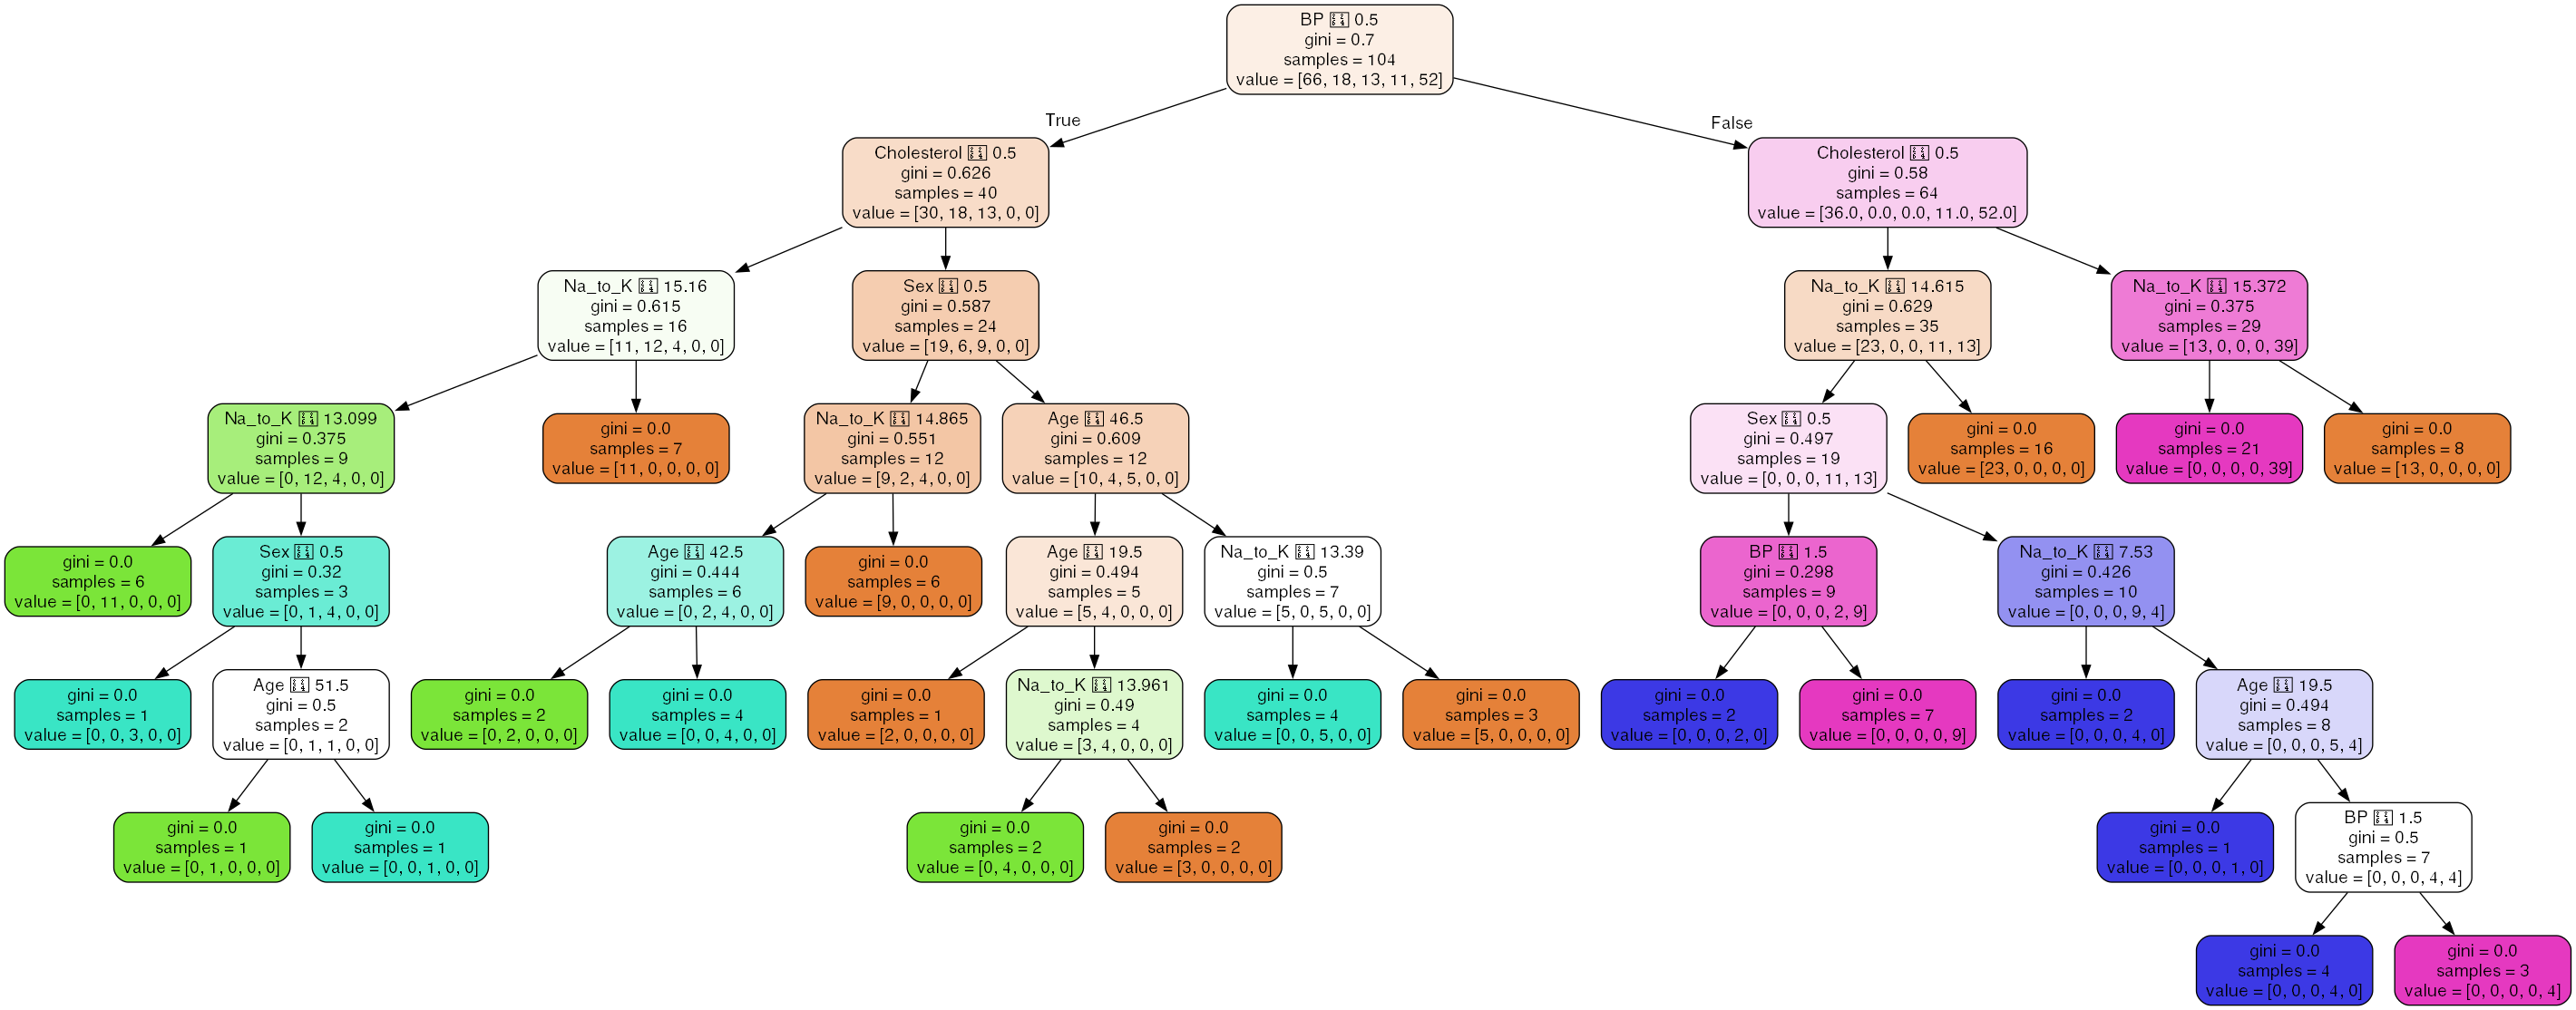

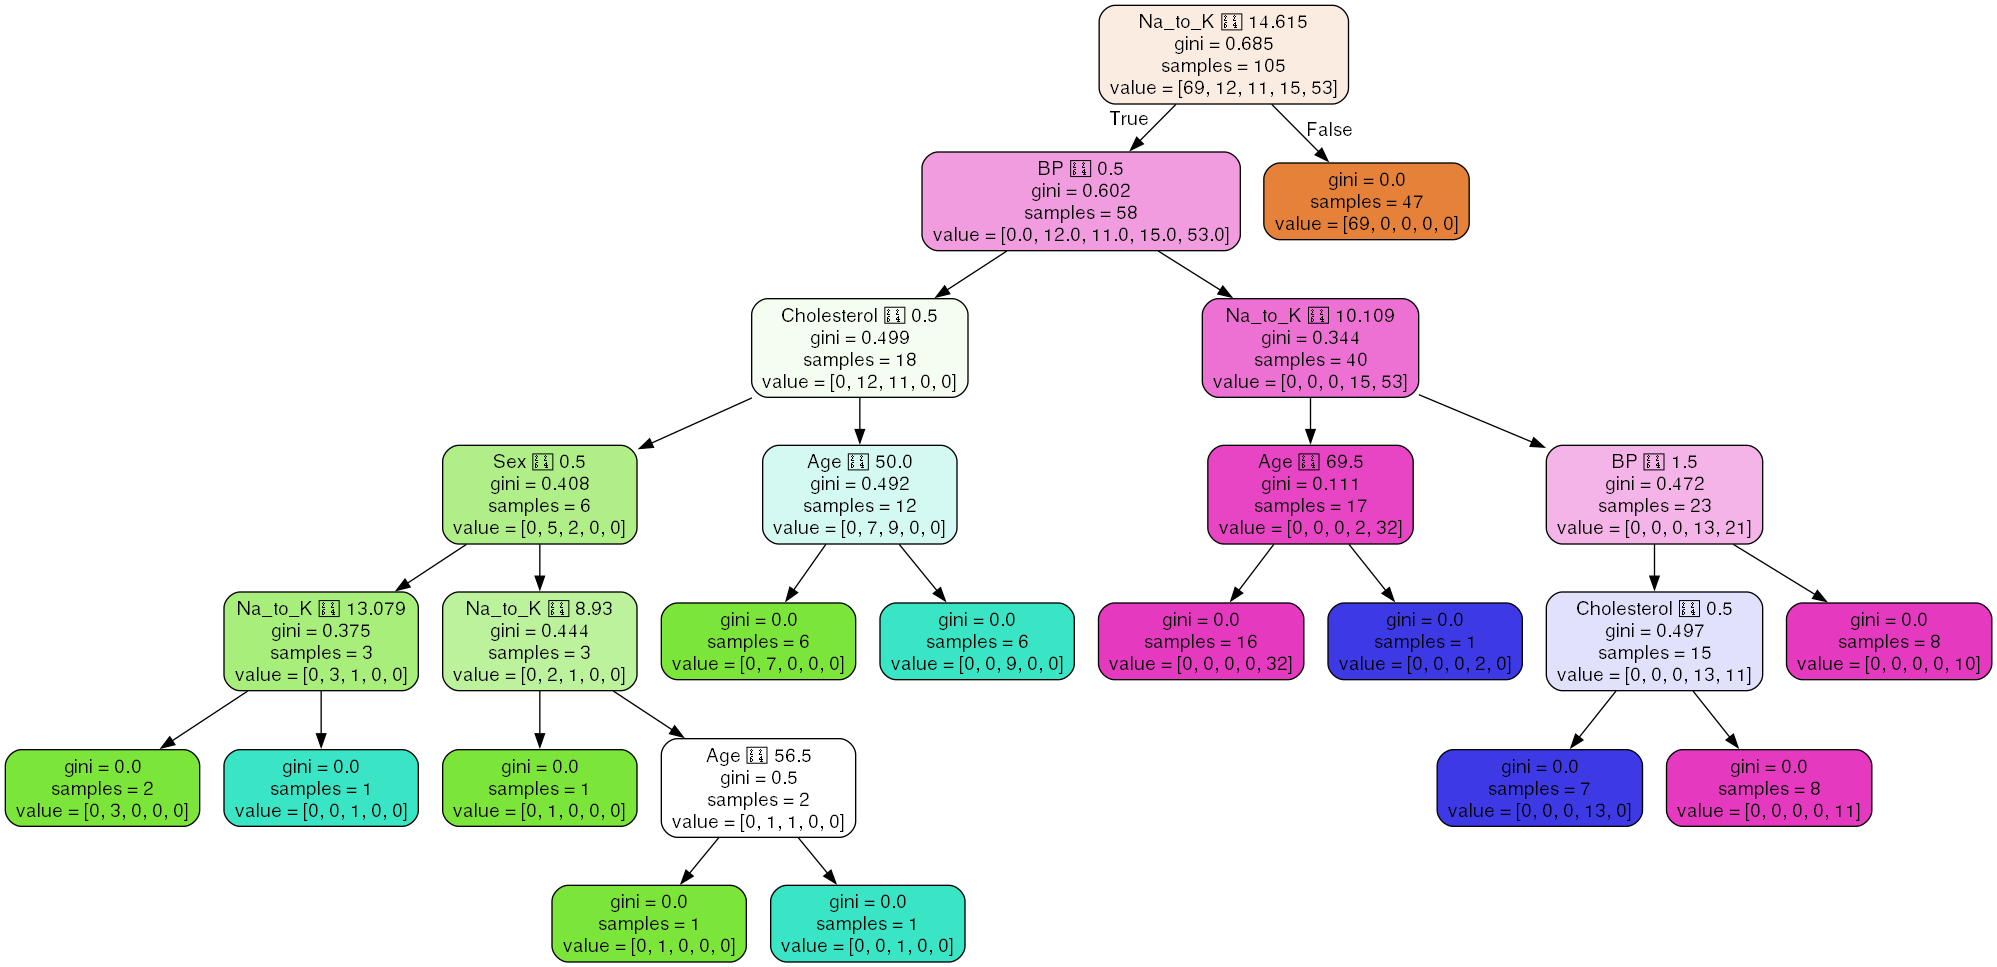

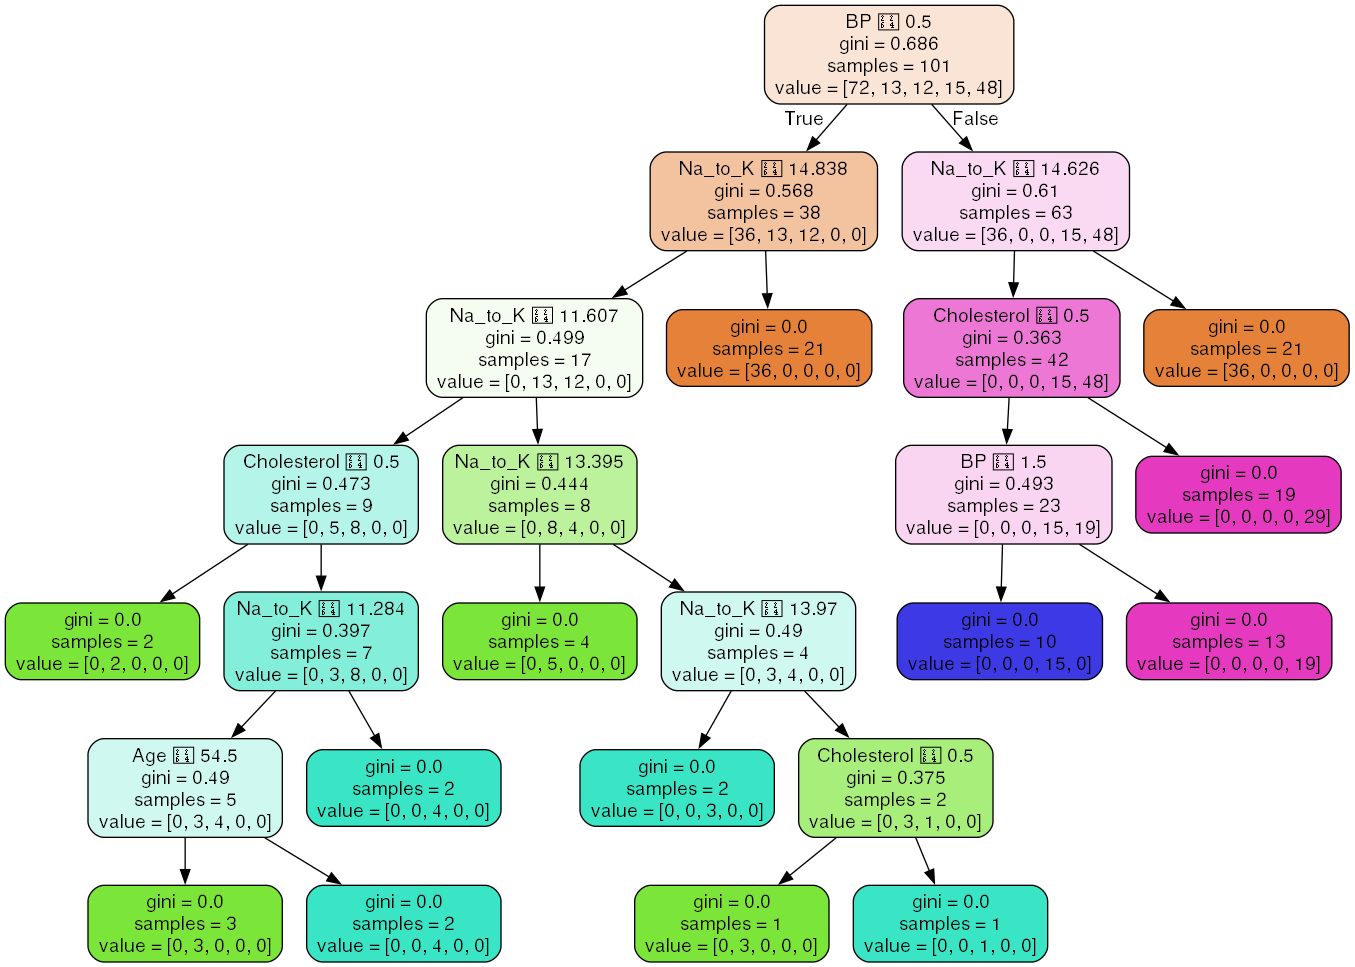

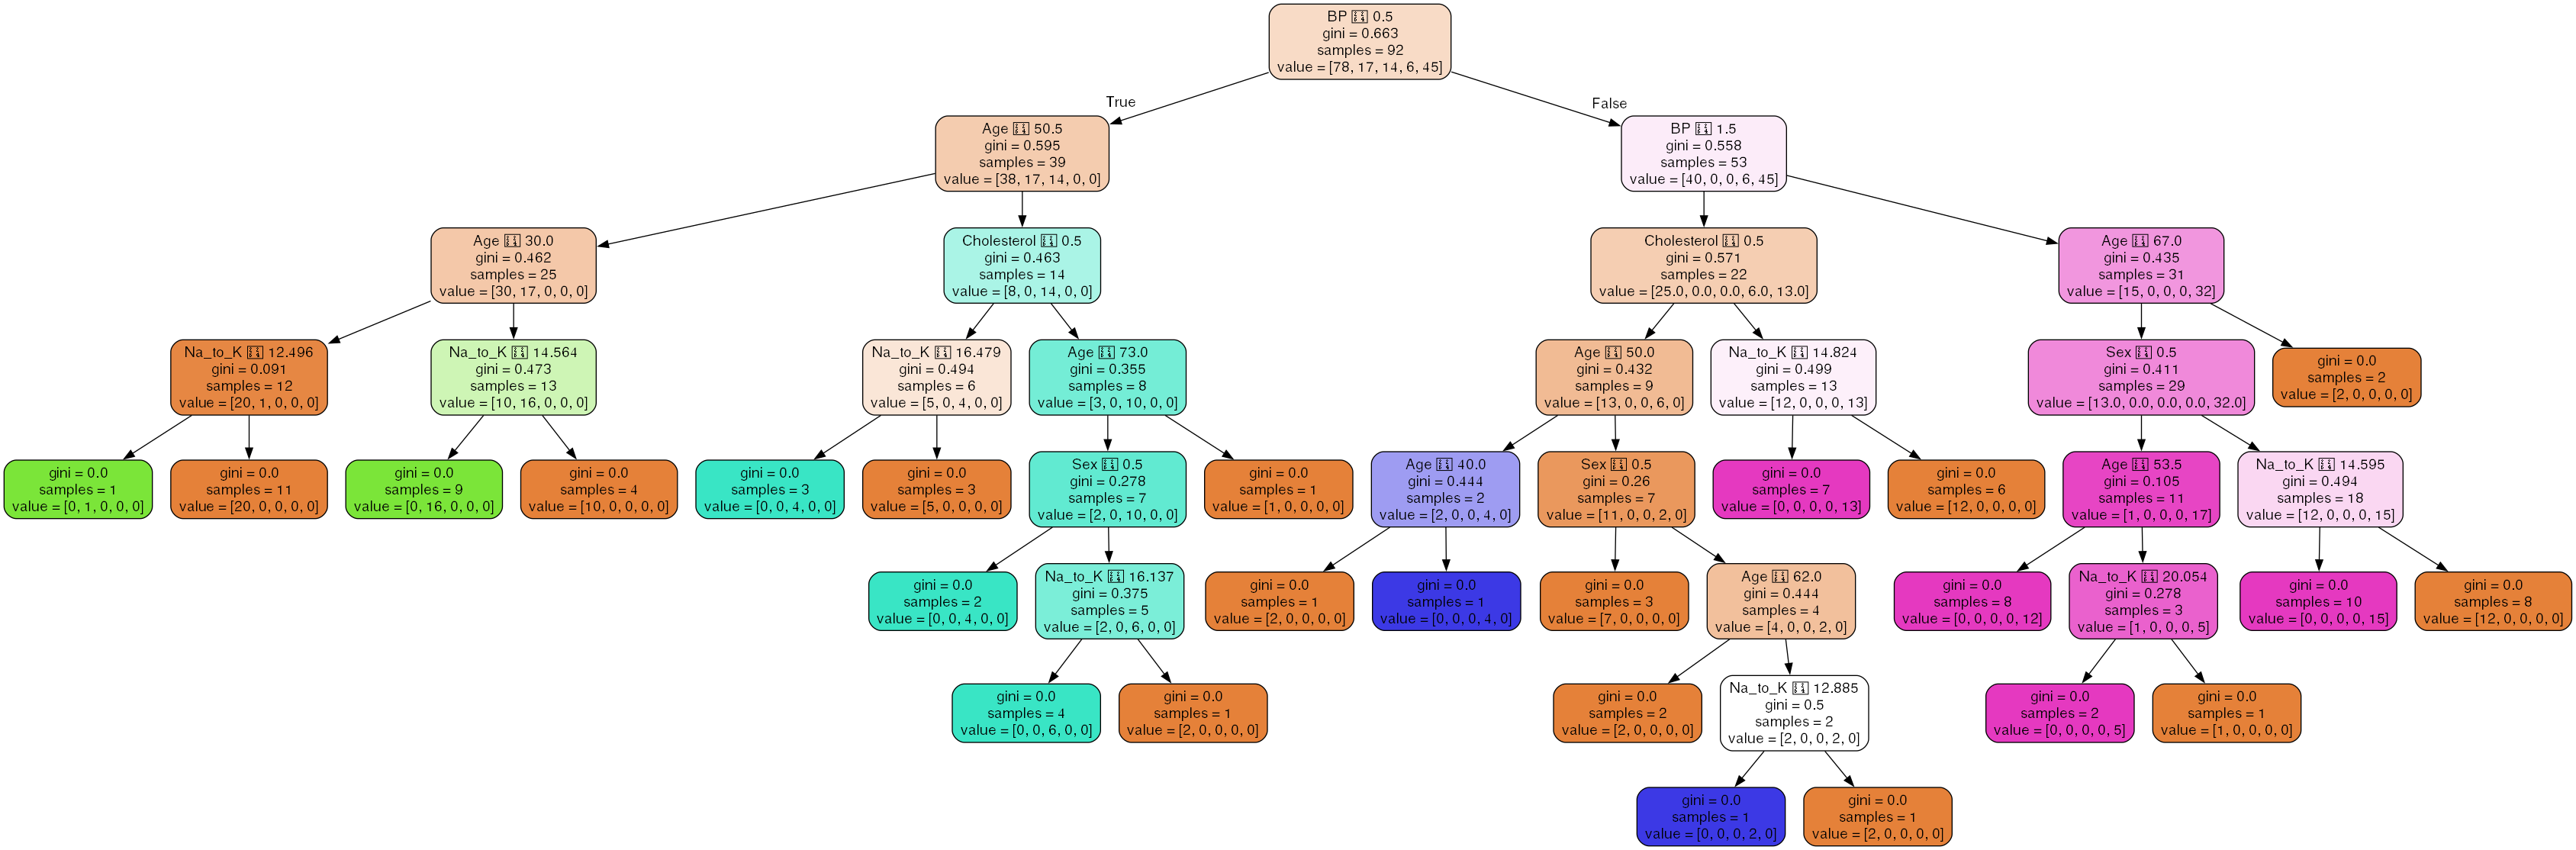

In [79]:
for i in range(5):
    dot_data = export_graphviz(tree1.estimators_[i], out_file=None, 
                            feature_names=list(X_train.columns),
                            filled=True, rounded=True, special_characters=True)  
    graph = graphviz.Source(dot_data, format='png')
    display(Image(graph.render()))

In [80]:
tree1.score(X_test, y_test)

0.95

In [81]:
tree1_predictions = tree1.predict(X_test)
cm = confusion_matrix(y_test, tree1_predictions)
cm

array([[18,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  1,  2,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 1,  0,  0,  0, 10]], dtype=int64)

In [82]:
lib.print_accuracy_score_for_classes(y_test, tree1_predictions)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 0.6666666666666666
3 	 1.0
4 	 0.9090909090909091


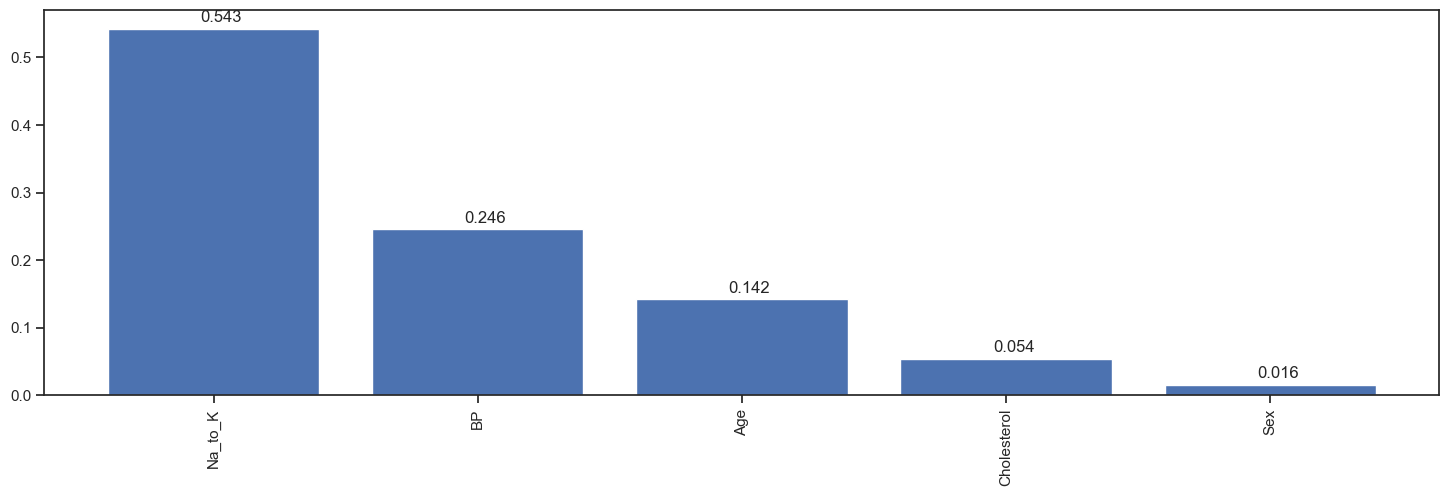

In [83]:
# Важность признаков
rf_cl = RandomForestClassifier(random_state=1)
rf_cl.fit(X_train, y_train)
_,_ = lib.draw_feature_importances(rf_cl, data_X)

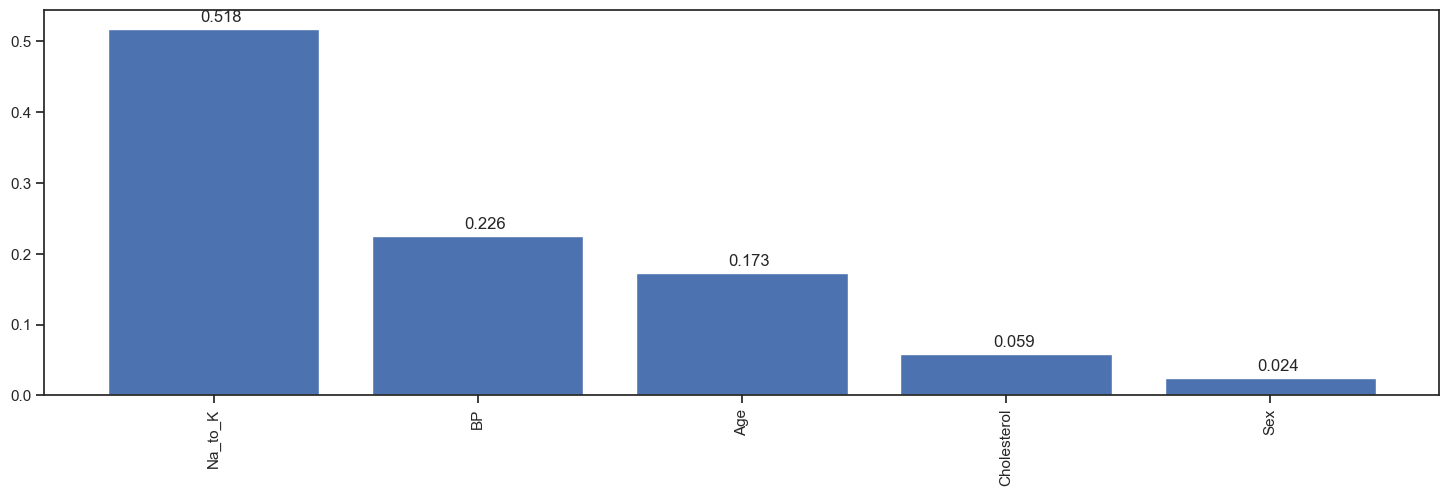

In [84]:
xtree_cl = ExtraTreesClassifier(random_state=1)
xtree_cl.fit(X_train, y_train)
_,_ = lib.draw_feature_importances(xtree_cl, X_train)

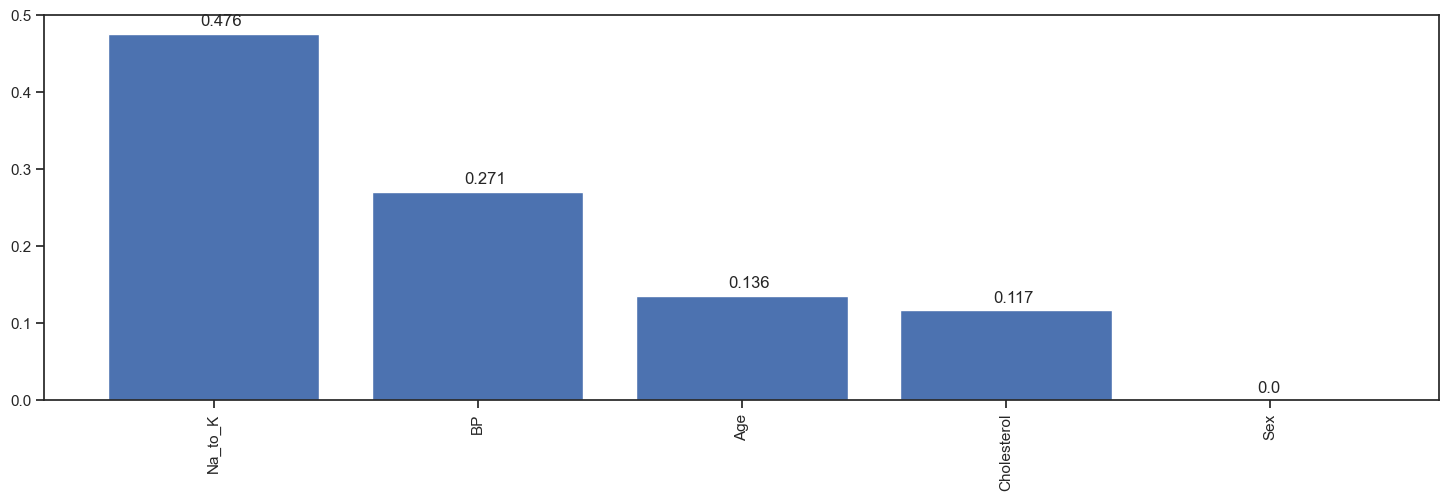

In [85]:
tree_cl = DecisionTreeClassifier(random_state=1)
tree_cl.fit(X_train, y_train)
_,_ = lib.draw_feature_importances(tree_cl, data_X)

In [86]:
model = [rf_cl, xtree_cl, tree_cl]
model_names = ["RandomForest", "ExtraTrees", "DecisionTree"]

for i in range(len(model)):
    model_name = model_names[i]
    print(f"{model_name} result:")
    lib.test_model(model[i], y_test, X_test)
    print("\n")

RandomForest result:
mean_absolute_error: 0.1
median_absolute_error: 0.0
r2_score: 0.8639455782312926


ExtraTrees result:
mean_absolute_error: 0.15
median_absolute_error: 0.0
r2_score: 0.8469387755102041


DecisionTree result:
mean_absolute_error: 0.1
median_absolute_error: 0.0
r2_score: 0.8639455782312926




### 2. Бустинг

In [87]:
# Обучим классификатор на 5 деревьях
ab1 = AdaBoostClassifier(n_estimators=5, algorithm='SAMME', random_state=10)
ab1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=5, random_state=10)

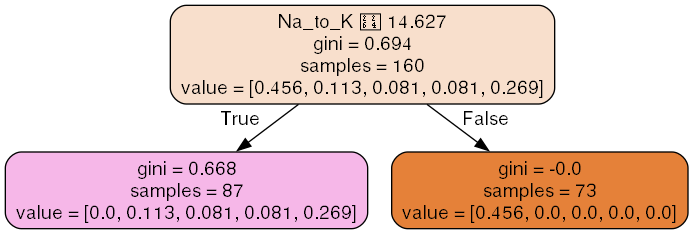

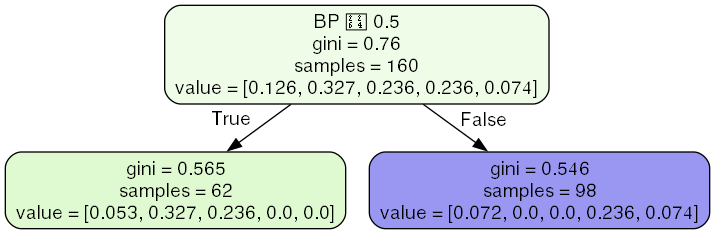

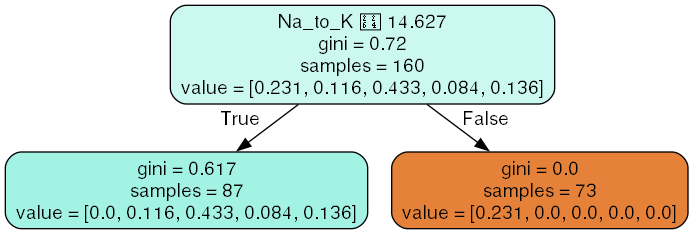

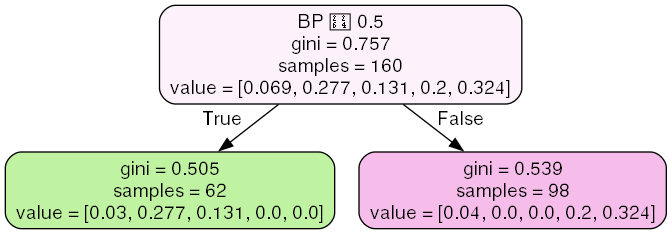

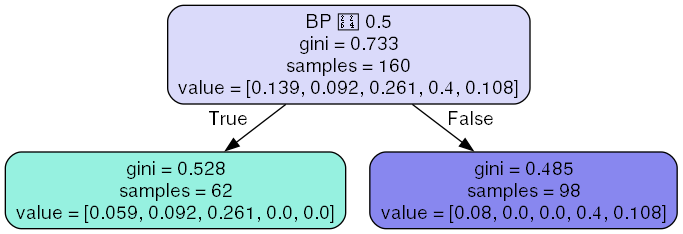

In [88]:
for i in range(5):
    dot_data = export_graphviz(ab1.estimators_[i], out_file=None, 
                            feature_names=list(X_train.columns),
                            filled=True, rounded=True, special_characters=True)  
    graph = graphviz.Source(dot_data, format='png')
    display(Image(graph.render()))

In [89]:
# Веса деревьев в ансамбле соответствуют параметру alpha_t:
ab1.estimator_weights_

array([2.35569492, 1.64222774, 2.06782601, 1.79284037, 2.05370163])

In [90]:
df1 = ab1.decision_function(X_train)
df1.shape

(160, 5)

In [91]:
# Метод decision_function(X) возвращает итоговое значение матрицы D_t:
df1[:10]

array([[-0.25      ,  0.18318293,  0.26974964, -0.25      ,  0.04706742],
       [-0.25      , -0.25      ,  0.01076541,  0.21607912,  0.27315547],
       [ 0.30783283, -0.25      , -0.25      ,  0.21607912, -0.02391195],
       [-0.25      , -0.25      ,  0.01076541,  0.21607912,  0.27315547],
       [-0.25      ,  0.18318293,  0.26974964, -0.25      ,  0.04706742],
       [ 0.30783283, -0.25      , -0.25      ,  0.21607912, -0.02391195],
       [-0.25      , -0.25      ,  0.01076541,  0.21607912,  0.27315547],
       [-0.25      , -0.25      ,  0.01076541,  0.21607912,  0.27315547],
       [-0.25      ,  0.18318293,  0.26974964, -0.25      ,  0.04706742],
       [ 0.30783283, -0.25      , -0.25      ,  0.21607912, -0.02391195]])

c:\Users\Lenovo\Desktop\BMSTU\SEM_6\TMO\labs-proj\.venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


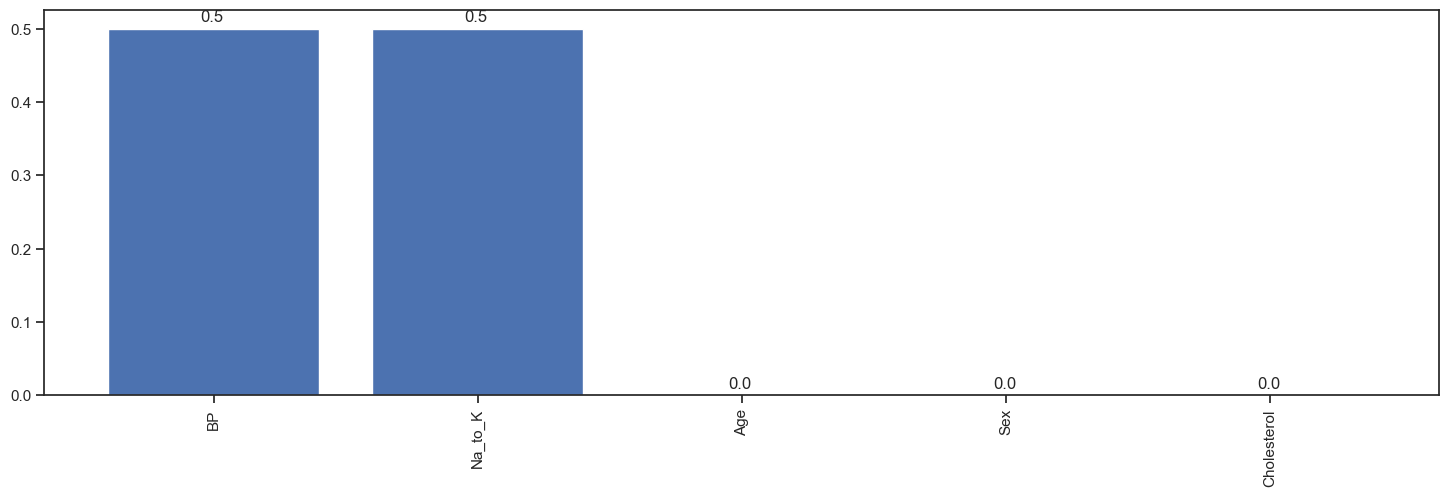

In [92]:
ab2 = AdaBoostClassifier(random_state=1)
ab2.fit(X_train, y_train)
_,_ = lib.draw_feature_importances(ab2, data_X)

In [93]:
ab1.score(X_test, y_test)

0.775

### 3. Градиентный бустинг

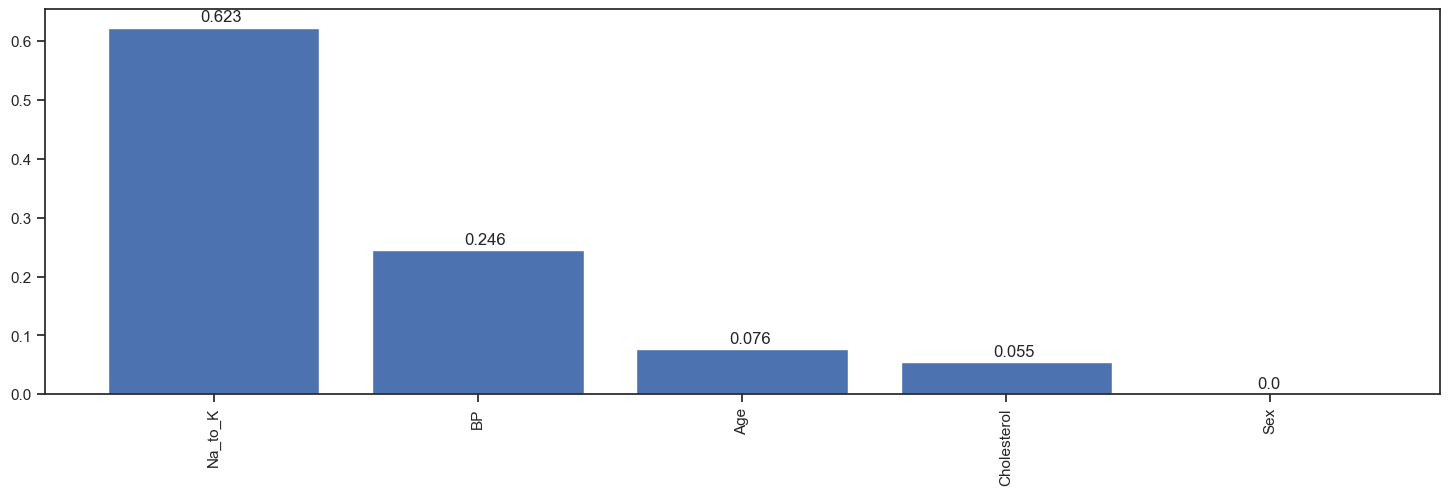

In [94]:
# Важность признаков
gb_cl = GradientBoostingClassifier(random_state=1)
gb_cl.fit(X_train, y_train)
_,_ = lib.draw_feature_importances(gb_cl, X_train)

In [95]:
gb_cl.score(X_test, y_test)

0.975

In [96]:
# Сравнение эффективностей
model = [ab1, gb_cl]
model_names = ["AdaBoost", "GradientBoosting"]

for i in range(len(model)):
    model_name = model_names[i]
    print(f"{model_name} result:")
    lib.test_model(model[i], y_test, X_test)
    print("\n")

AdaBoost result:
mean_absolute_error: 0.3
median_absolute_error: 0.0
r2_score: 0.7959183673469388


GradientBoosting result:
mean_absolute_error: 0.1
median_absolute_error: 0.0
r2_score: 0.8639455782312926




XGBoostClassifier

In [97]:
xgb_cl = XGBClassifier(num_classes=5, n_estimators=5)

In [98]:
xgb_cl.fit(X_train, y_train)

c:\Users\Lenovo\Desktop\BMSTU\SEM_6\TMO\labs-proj\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:21:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None, num_classes=5,
              num_parallel_tree=None, ...)

In [99]:
xgb_cl.score(X_test, y_test)

0.975

Финальное сравнение эффективностей

In [100]:
# test_model outdated
model = [rf_cl, xtree_cl, tree_cl, ab1, gb_cl, xgb_cl]
model_names = ["RandomForest", "ExtraTrees", "DecisionTree",
               "AdaBoost", "GradientBoosting", "XGBoost"]

for i in range(len(model)):
    model_name = model_names[i]
    print(f"{model_name} result:")
    lib.test_model(model[i], y_test, X_test)
    print("\n")

RandomForest result:
mean_absolute_error: 0.1
median_absolute_error: 0.0
r2_score: 0.8639455782312926


ExtraTrees result:
mean_absolute_error: 0.15
median_absolute_error: 0.0
r2_score: 0.8469387755102041


DecisionTree result:
mean_absolute_error: 0.1
median_absolute_error: 0.0
r2_score: 0.8639455782312926


AdaBoost result:
mean_absolute_error: 0.3
median_absolute_error: 0.0
r2_score: 0.7959183673469388


GradientBoosting result:
mean_absolute_error: 0.1
median_absolute_error: 0.0
r2_score: 0.8639455782312926


XGBoost result:
mean_absolute_error: 0.05
median_absolute_error: 0.0
r2_score: 0.9659863945578231


